<p style = "font-size : 50px; color : 'blue' ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>IRIS FLOWER CLASSIFICATION</strong></p>

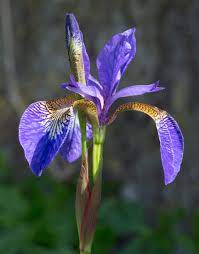

In [13]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [14]:
df=pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
#information about the dataset
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
#describing about the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
df.shape

(150, 5)

### We drop the column id because it is not important.

In [18]:
df.drop('sepal_length',axis=1,inplace=True)

In [19]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


In [20]:
#count the value
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [21]:
#finding the null value
df.isnull().sum()

sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

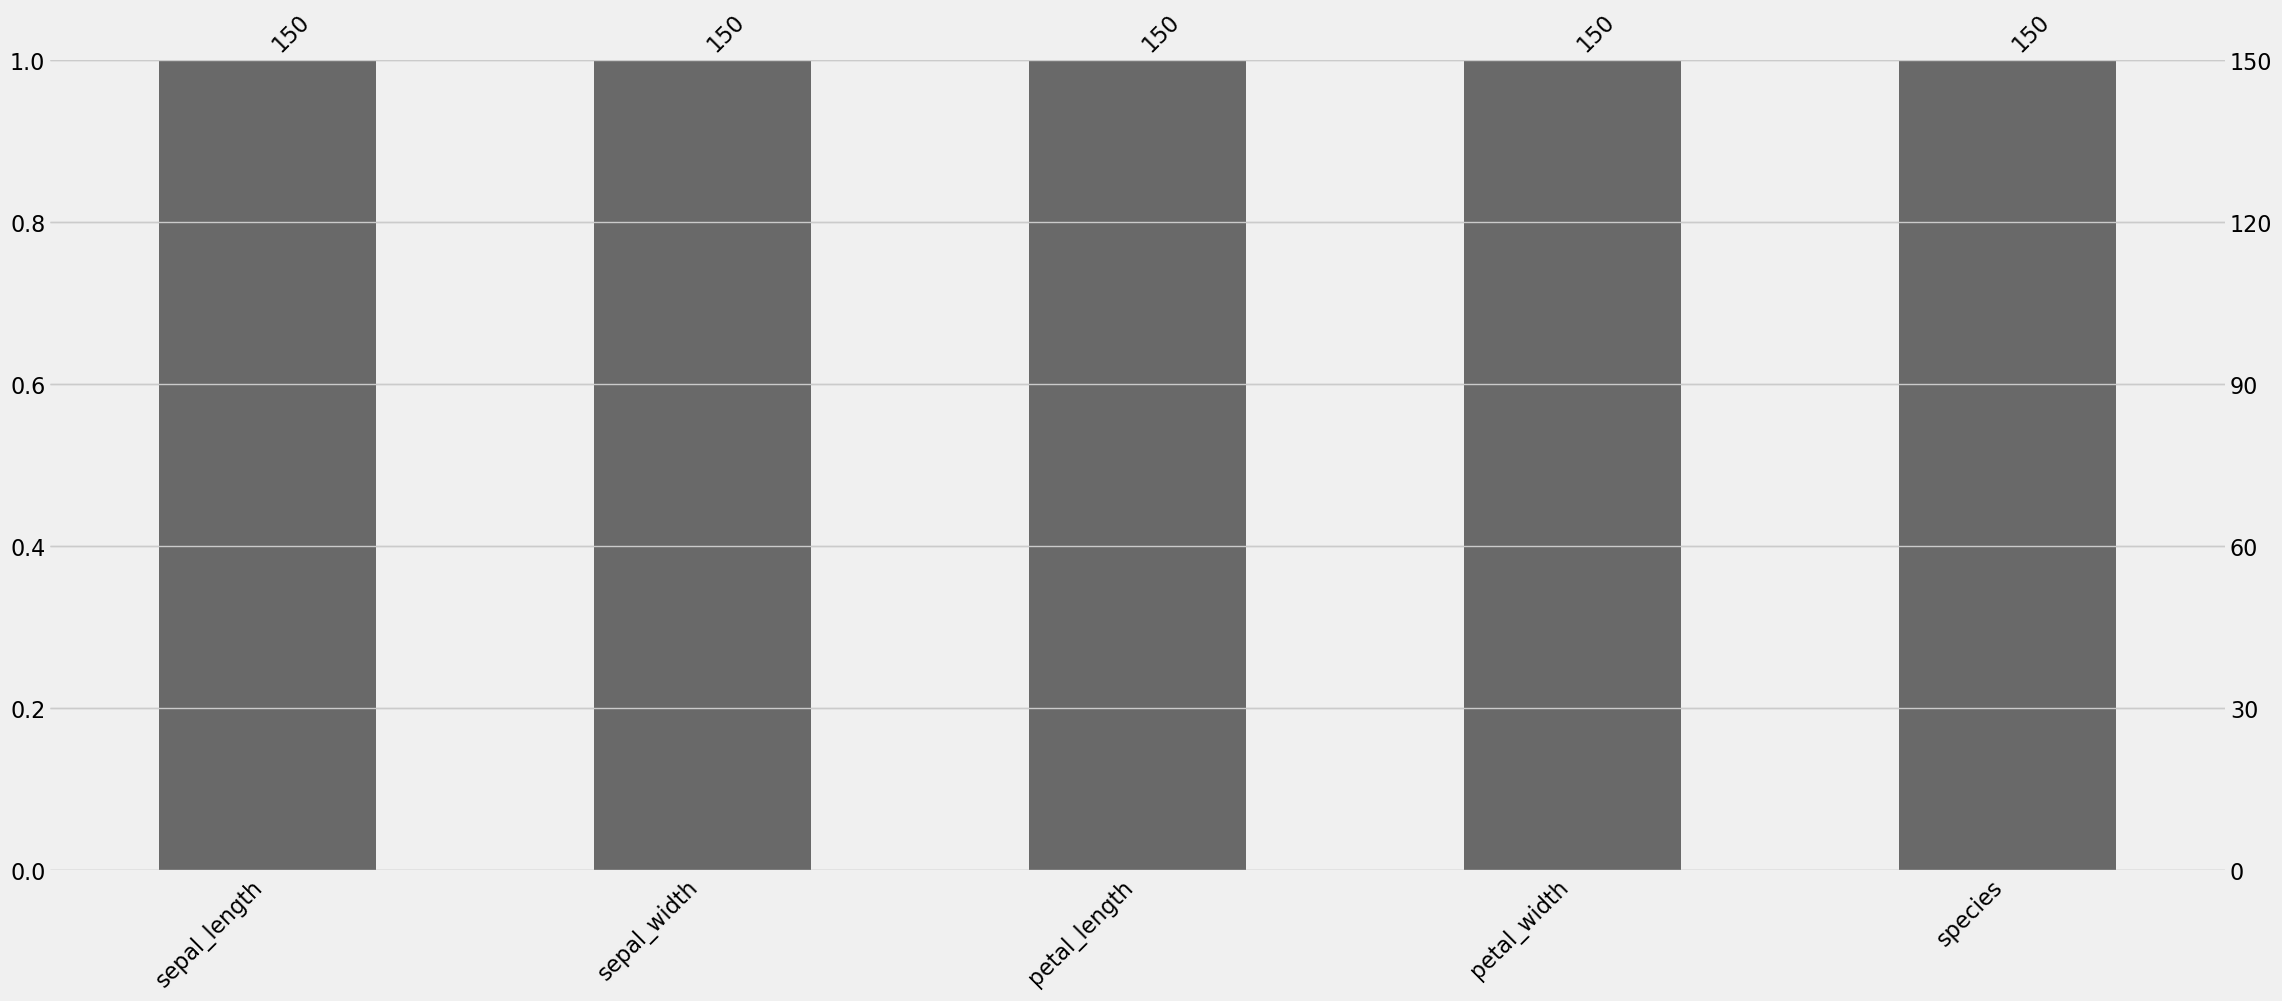

In [22]:
import pandas as pd
import missingno as msno
df = pd.read_csv('Iris.csv')
msno.bar(df)

In [23]:
df.drop_duplicates(inplace=True)

# EDA 

### 1. Relationship between species and sepal length

<Axes: xlabel='species', ylabel='sepal_length'>

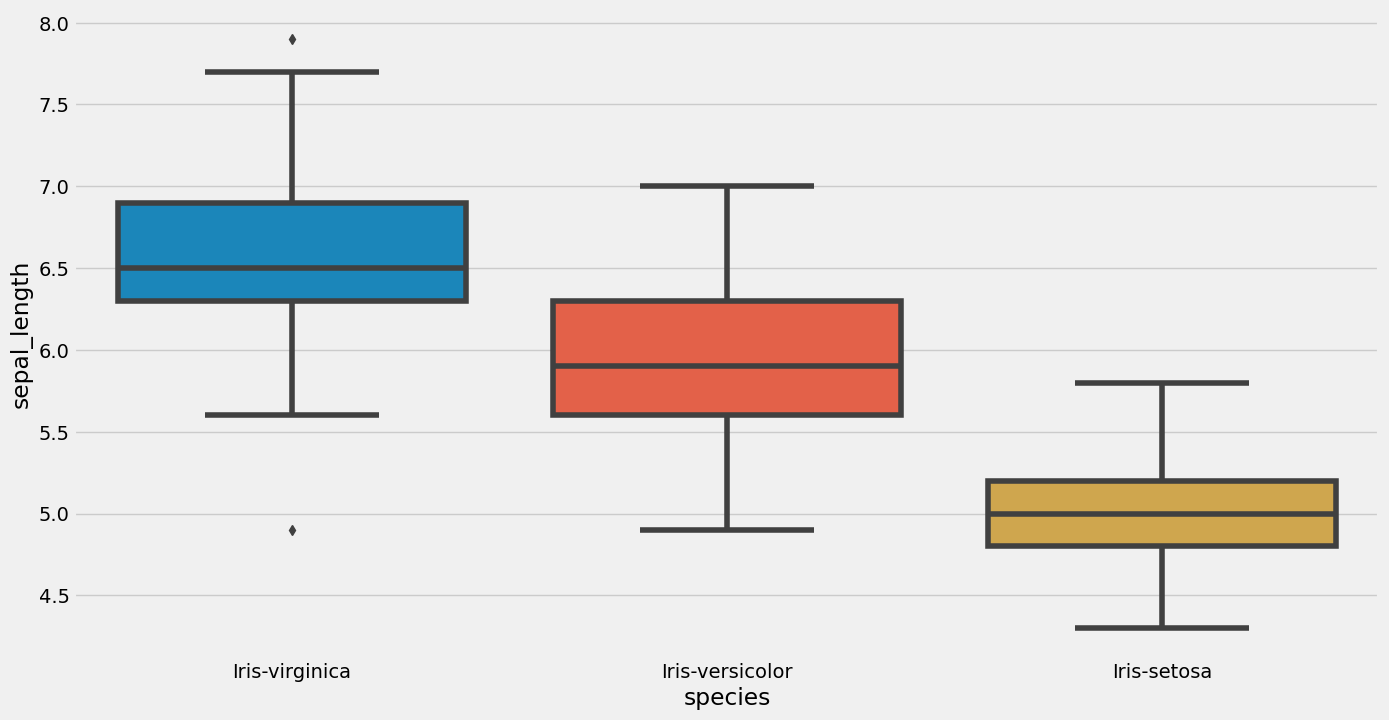

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.boxplot(x='species',y='sepal_length',data=df.sort_values('petal_width',ascending=False))

# 2. Relationship between species and petal length

<Axes: xlabel='species', ylabel='petal_length'>

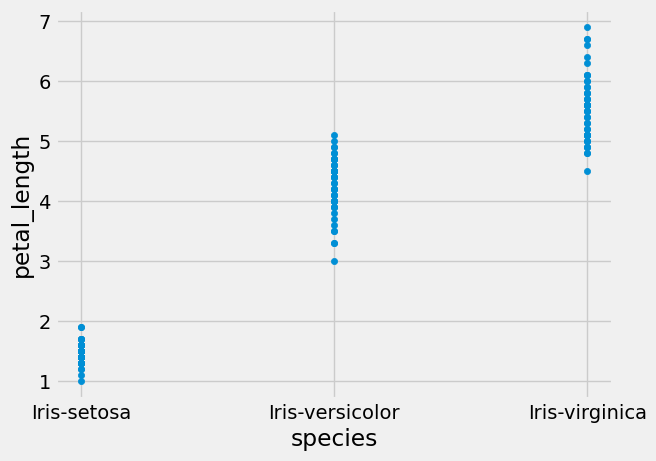

In [34]:
df.plot(kind='scatter',x='species',y='petal_length')

### 4.Pairplot

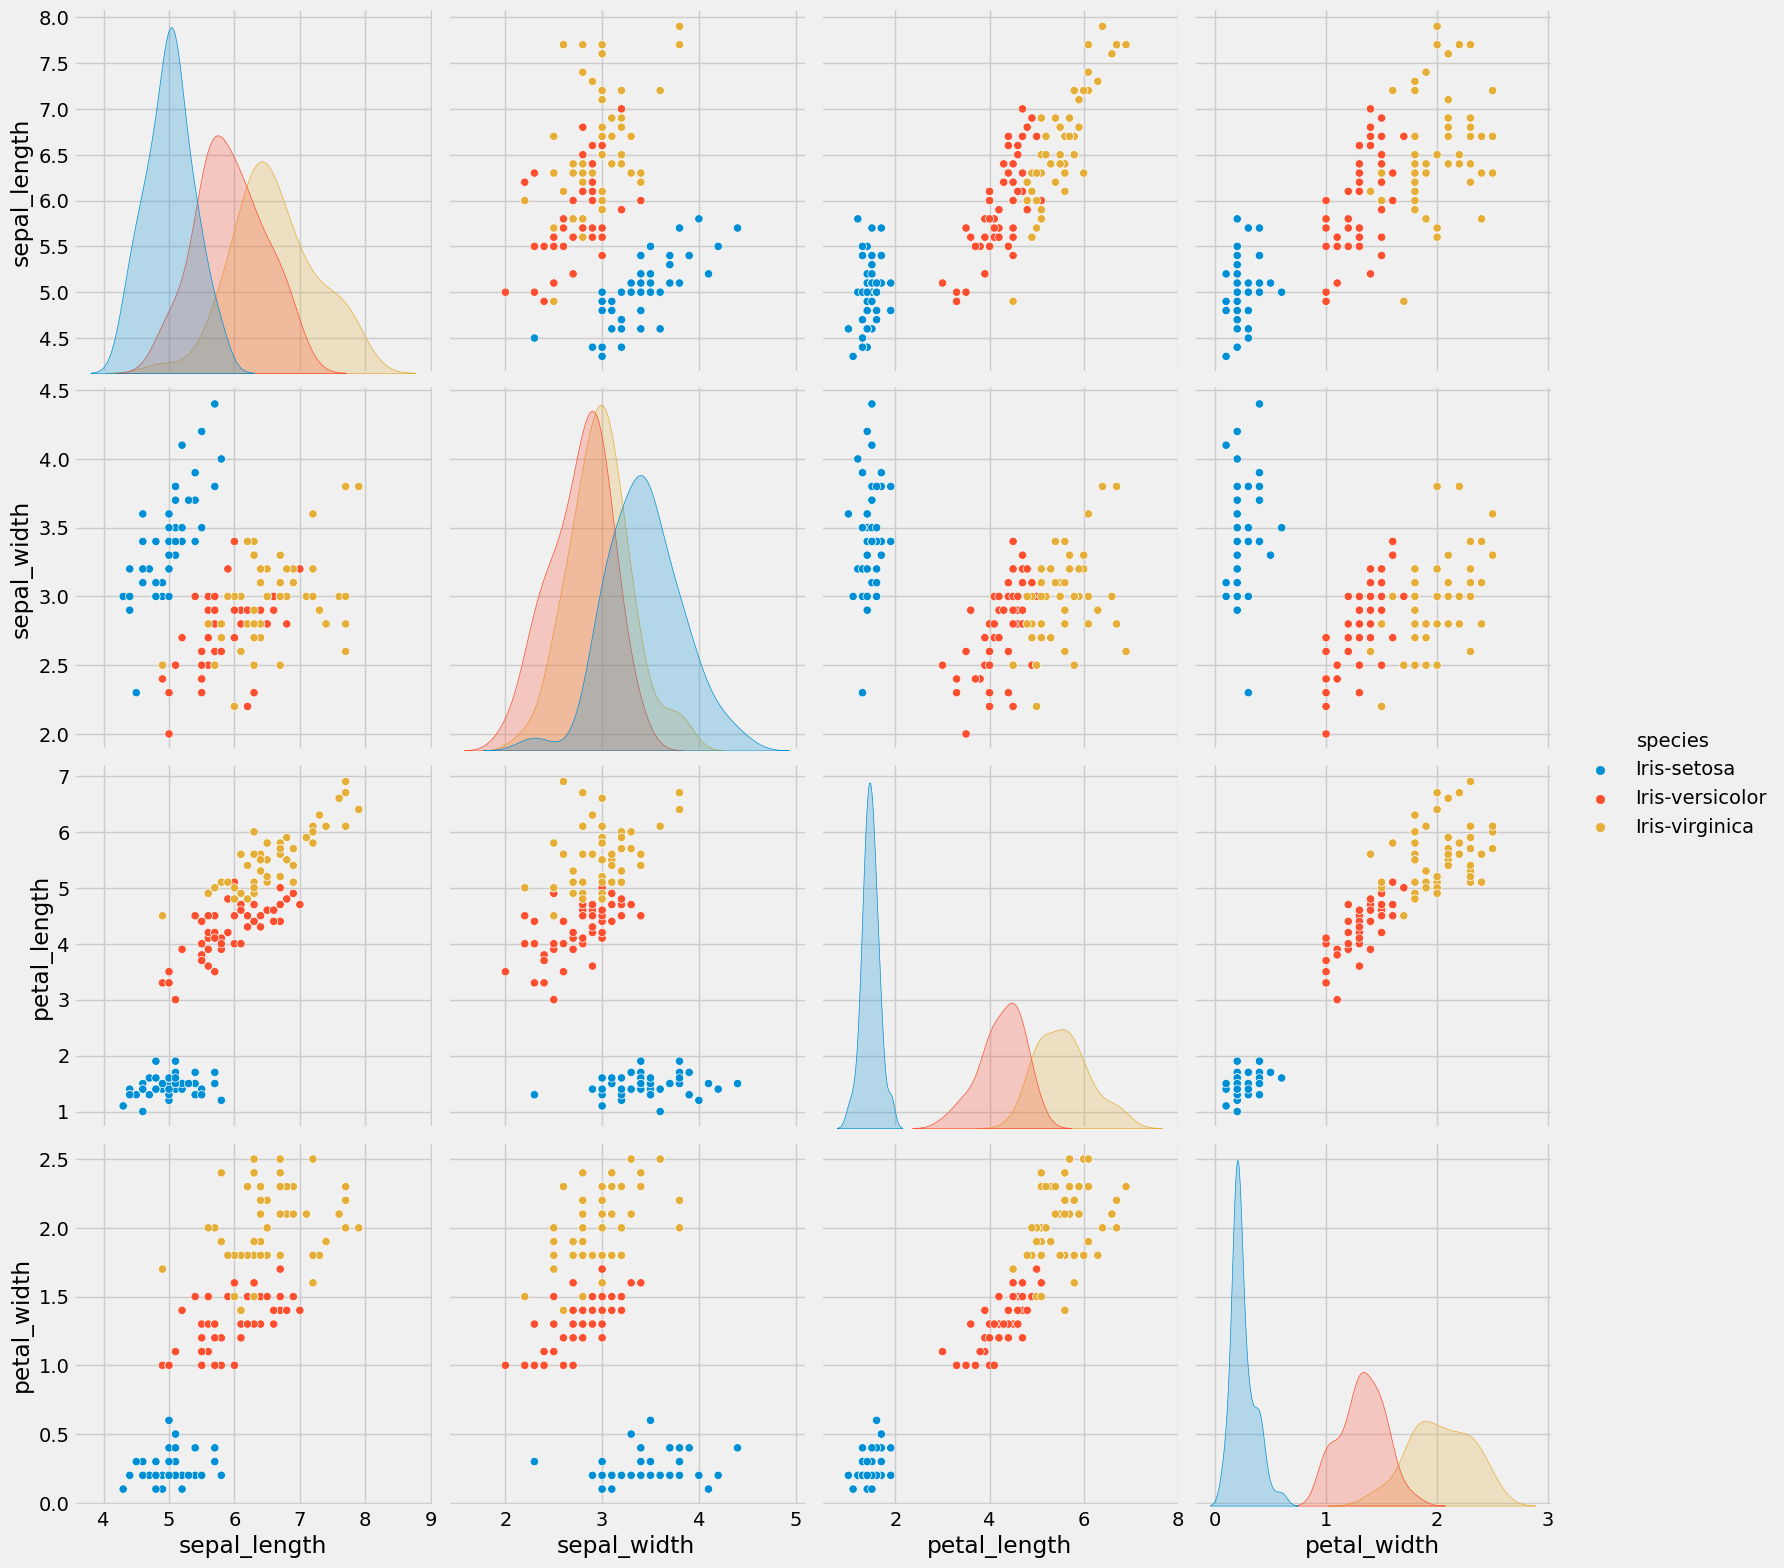

In [30]:
sns.pairplot(df, hue="species", size=4)

### 5. Boxplot

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

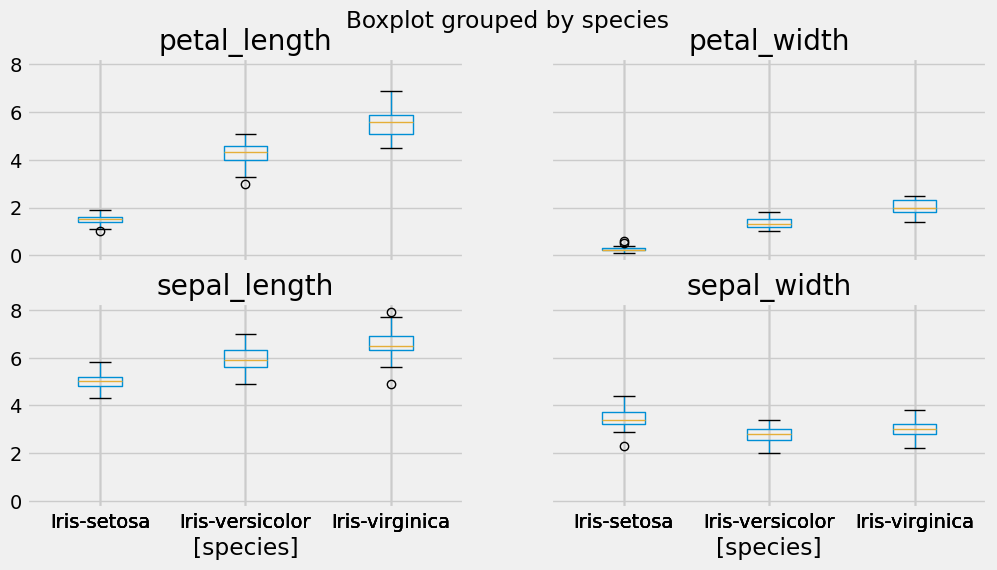

In [36]:
df.boxplot(by="species", figsize=(12, 6))

### 5. Andrews_curves

<Axes: >

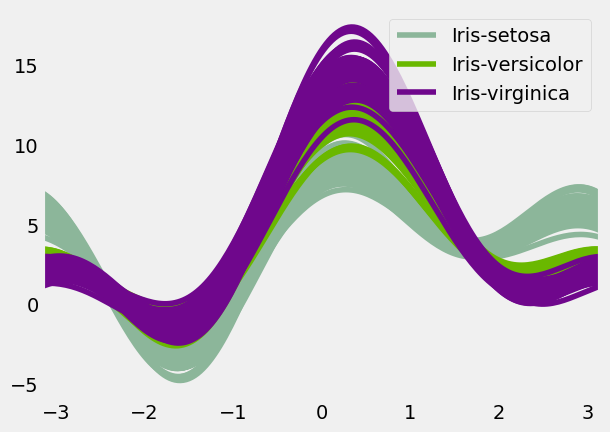

In [37]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "species")

### 7.Violinplot

<Axes: xlabel='species', ylabel='sepal_width'>

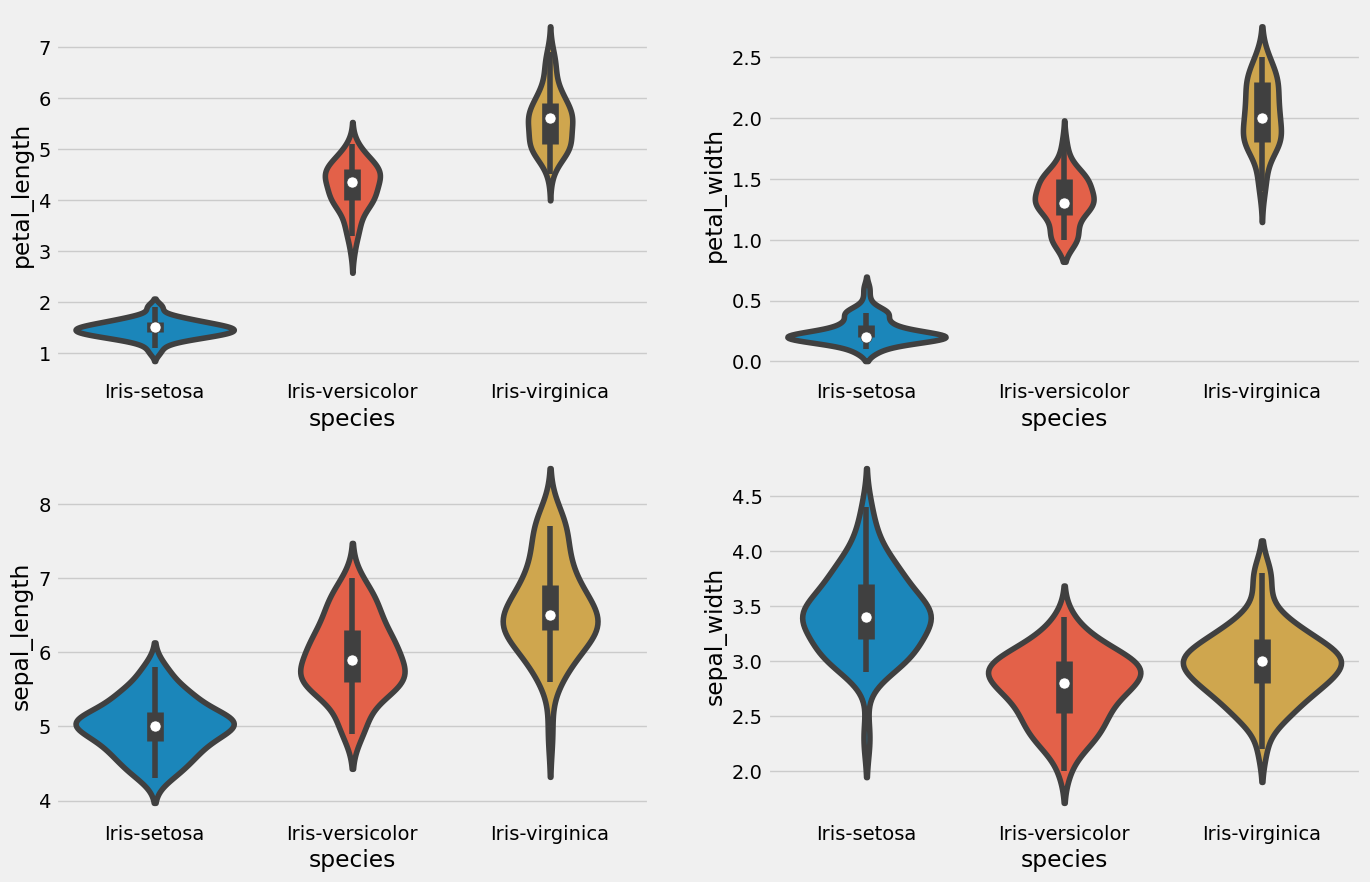

In [43]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

# Neural Network

In [57]:
X=df.drop('species',axis=1)
y=df['species']


In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [60]:
df['species'] = pd.Categorical(df.species)
df['species'] = df.species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.species)


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [62]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [63]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 54ms/step - loss: 1.4878 - accuracy: 0.3431 - val_loss: 1.3981 - val_accuracy: 0.3778
Epoch 2/45
4/4 [==============================] - 0s 10ms/step - loss: 1.3221 - accuracy: 0.4412 - val_loss: 1.2477 - val_accuracy: 0.3333
Epoch 3/45
4/4 [==============================] - 0s 11ms/step - loss: 1.1945 - accuracy: 0.3333 - val_loss: 1.1351 - val_accuracy: 0.3333
Epoch 4/45
4/4 [==============================] - 0s 9ms/step - loss: 1.0915 - accuracy: 0.3333 - val_loss: 1.0462 - val_accuracy: 0.3333
Epoch 5/45
4/4 [==============================] - 0s 12ms/step - loss: 1.0160 - accuracy: 0.3431 - val_loss: 0.9796 - val_accuracy: 0.4444
Epoch 6/45
4/4 [==============================] - 0s 10ms/step - loss: 0.9613 - accuracy: 0.5098 - val_loss: 0.9370 - val_accuracy: 0.8444
Epoch 7/45
4/4 [==============================] - 0s 9ms/step - loss: 0.9256 - accuracy: 0.8725 - val_loss: 0.8962 - val_accuracy: 0.9111
Epoch 8/45
4/4 [=============

In [65]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.3871 - accuracy: 0.9556


[0.387053519487381, 0.9555555582046509]

In [66]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 65ms/step
[[0.00871473 0.32293066 0.6683546 ]
 [0.00659285 0.29513368 0.6982735 ]
 [0.0834362  0.5859477  0.33061606]
 [0.05144535 0.52671695 0.42183763]
 [0.9106376  0.07495496 0.01440737]
 [0.05152897 0.5809678  0.3675032 ]
 [0.00860832 0.25328395 0.7381077 ]
 [0.0091955  0.27000946 0.7207951 ]
 [0.9086064  0.07730744 0.0140862 ]
 [0.01623975 0.39916816 0.5845921 ]]


In [67]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [68]:
history.history['accuracy']

[0.343137264251709,
 0.44117647409439087,
 0.3333333432674408,
 0.3333333432674408,
 0.343137264251709,
 0.5098039507865906,
 0.8725489974021912,
 0.8725489974021912,
 0.7745097875595093,
 0.686274528503418,
 0.7549019455909729,
 0.8725489974021912,
 0.9117646813392639,
 0.9117646813392639,
 0.9215686321258545,
 0.9117646813392639,
 0.8333333134651184,
 0.813725471496582,
 0.8333333134651184,
 0.8823529481887817,
 0.9607843160629272,
 0.9607843160629272,
 0.9411764740943909,
 0.8823529481887817,
 0.8529411554336548,
 0.8627451062202454,
 0.8627451062202454,
 0.843137264251709,
 0.8235294222831726,
 0.9019607901573181,
 0.970588207244873,
 0.9607843160629272,
 0.970588207244873,
 0.9313725233078003,
 0.8627451062202454,
 0.8725489974021912,
 0.9313725233078003,
 0.970588207244873,
 0.970588207244873,
 0.9215686321258545,
 0.9509803652763367,
 0.970588207244873,
 0.9411764740943909,
 0.9411764740943909,
 0.9607843160629272]

In [69]:
history.history['val_accuracy']

[0.3777777850627899,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.4444444477558136,
 0.8444444537162781,
 0.9111111164093018,
 0.800000011920929,
 0.6666666865348816,
 0.6888889074325562,
 0.8222222328186035,
 0.8666666746139526,
 0.8888888955116272,
 0.8666666746139526,
 0.9555555582046509,
 0.8444444537162781,
 0.8222222328186035,
 0.8222222328186035,
 0.8222222328186035,
 0.8888888955116272,
 0.9555555582046509,
 0.9777777791023254,
 0.8666666746139526,
 0.8222222328186035,
 0.8222222328186035,
 0.8222222328186035,
 0.8222222328186035,
 0.8222222328186035,
 0.8222222328186035,
 0.9555555582046509,
 0.9777777791023254,
 0.9777777791023254,
 0.9333333373069763,
 0.8222222328186035,
 0.8222222328186035,
 0.8666666746139526,
 0.9777777791023254,
 0.9777777791023254,
 0.9333333373069763,
 0.8666666746139526,
 0.9777777791023254,
 0.9777777791023254,
 0.9555555582046509,
 0.9777777791023254,
 0.9555555582046509]

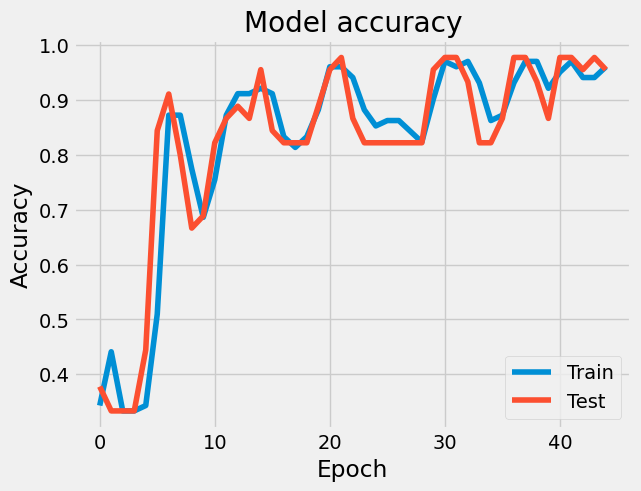

In [70]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

